# Intermezzo - Piece-wise linear sinus()
2021 08 3 Maarten Pennings

When [modeling the sinus function](sinus.ipynb), it seemed that the simple model (`model_1`) behaved like
a piece-wise linear approximation. Some investigation indicated that this model could indeed implement a 
piece-wise linear curve, see the [notebook](piecewise-linear.ipynb) on that for details. 

The next question I had: if I have a model with 9 + 1 neurons, the piece-wise linear investigation suggests that an approximation with 9 segments is possible. The training didn't find that. Can we configure that by hand?


# Getting started
We start by importing `math` for sinus and `matploylib.pyplot` for plotting it.

In [1]:
import math
import matplotlib.pyplot as plt

We also use the `relu()` function which is not standard in Python., which is not standard in Python, so we define it ourselves.

In [2]:
def relu(x) : return max(0,x)

## The sinus()

Let us first set up the sinus data. We create a list of 101 samples.

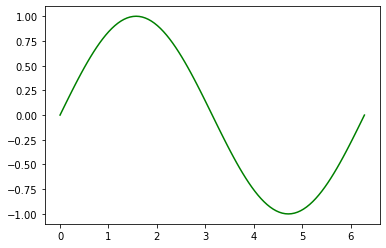

In [3]:
sinus_xs=[ 2*math.pi * t/100.0 for t in range(100+1)]
sinus_ys=[ math.sin(x) for x in sinus_xs ]

plt.plot(sinus_xs,sinus_ys,'g-');

As a next step, we add the knee-points. The `d1` and `d2` spread the knee-points evenly around the two extremes (but probably not at the most optimal positions).

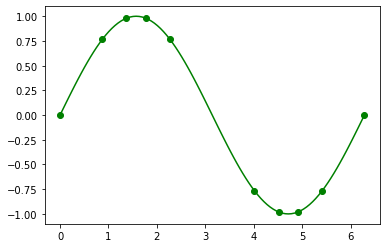

In [4]:
d1 = 0.2
d2 = 0.7
knees_xs = [ 0, 
            0.5*math.pi-d2, 0.5*math.pi-d1, 0.5*math.pi+d1, 0.5*math.pi+d2,
            1.5*math.pi-d2, 1.5*math.pi-d1, 1.5*math.pi+d1, 1.5*math.pi+d2,
            2*math.pi
          ]
knees_ys = [ math.sin(x) for x in knees_xs ]

plt.plot(sinus_xs,sinus_ys,'g-');
plt.plot(knees_xs,knees_ys,'go');

## Setting up the piece-wise linear approximation

We set up the first layer with 9 neurons, just like `model_1` in the [sinus notebook](sinus.ipynb) had.

As [piecewise linear notebook](piecewise-linear.ipynb) suggested, the weights are set to 1 and the biases to the x-ccordinate of the knee-points.

In [5]:
# Layer 1
def neuron_1_0(v_0) :
    weight_1_0 = 1
    bias_1_0   = -knees_xs[0]
    return relu( weight_1_0 * v_0 +bias_1_0 )

def neuron_1_1(v_0) :
    weight_1_1 = 1
    bias_1_1   = -knees_xs[1]
    return relu( weight_1_1 * v_0 +bias_1_1 )

def neuron_1_2(v_0) :
    weight_1_2 = 1
    bias_1_2   = -knees_xs[2]
    return relu( weight_1_2 * v_0 +bias_1_2 )

def neuron_1_3(v_0) :
    weight_1_3 = 1
    bias_1_3   = -knees_xs[3]
    return relu( weight_1_3 * v_0 +bias_1_3 )

def neuron_1_4(v_0) :
    weight_1_4 = 1
    bias_1_4   = -knees_xs[4]
    return relu( weight_1_4 * v_0 +bias_1_4 )

def neuron_1_5(v_0) :
    weight_1_5 = 1
    bias_1_5   = -knees_xs[5]
    return relu( weight_1_5 * v_0 +bias_1_5 )

def neuron_1_6(v_0) :
    weight_1_6 = 1
    bias_1_6   = -knees_xs[6]
    return relu( weight_1_6 * v_0 +bias_1_6 )

def neuron_1_7(v_0) :
    weight_1_7 = 1
    bias_1_7   = -knees_xs[7]
    return relu( weight_1_7 * v_0 +bias_1_7 )

def neuron_1_8(v_0) :
    weight_1_8 = 1
    bias_1_8   = -knees_xs[8]
    return relu( weight_1_8 * v_0 +bias_1_8 )

For the second layer, we need the slopes. We have 10 knee points (the lenght of e.g. `knees_xs`), and thus 9 segments, and thus 9 slopes (numbered 0 up to and including 8).

In [6]:
# layer 2
slope0 = (knees_ys[1]-knees_ys[0]) / (knees_xs[1]-knees_xs[0])
slope1 = (knees_ys[2]-knees_ys[1]) / (knees_xs[2]-knees_xs[1])
slope2 = (knees_ys[3]-knees_ys[2]) / (knees_xs[3]-knees_xs[2])
slope3 = (knees_ys[4]-knees_ys[3]) / (knees_xs[4]-knees_xs[3])
slope4 = (knees_ys[5]-knees_ys[4]) / (knees_xs[5]-knees_xs[4])
slope5 = (knees_ys[6]-knees_ys[5]) / (knees_xs[6]-knees_xs[5])
slope6 = (knees_ys[7]-knees_ys[6]) / (knees_xs[7]-knees_xs[6])
slope7 = (knees_ys[8]-knees_ys[7]) / (knees_xs[8]-knees_xs[7])
slope8 = (knees_ys[9]-knees_ys[8]) / (knees_xs[9]-knees_xs[8])

Layer 2 has one neuron. As [piecewise linear notebook](piecewise-linear.ipynb) suggested, the weight for segment _k_ is the slope for segment _k_ minus the slope for the previous segment.

In [7]:
# layer 2
def neuron_2(v_1_0, v_1_1, v_1_2, v_1_3, v_1_4, v_1_5, v_1_6, v_1_7, v_1_8) :
    weight_2_0 = slope0
    weight_2_1 = slope1 - slope0
    weight_2_2 = slope2 - slope1
    weight_2_3 = slope3 - slope2
    weight_2_4 = slope4 - slope3
    weight_2_5 = slope5 - slope4
    weight_2_6 = slope6 - slope5
    weight_2_7 = slope7 - slope6
    weight_2_8 = slope8 - slope7
    bias_2     = knees_xs[0]
    return (weight_2_0*v_1_0 + weight_2_1*v_1_1 + weight_2_2*v_1_2 + weight_2_3*v_1_3 + weight_2_4*v_1_4 +
        weight_2_5*v_1_5 + weight_2_6*v_1_6 + weight_2_7*v_1_7 + weight_2_8*v_1_8 + bias_2)

The next function defines the data flow through the whole network.

In [8]:
# Network
def network(v_0) :
    v_1_0 = neuron_1_0(v_0)
    v_1_1 = neuron_1_1(v_0)
    v_1_2 = neuron_1_2(v_0)
    v_1_3 = neuron_1_3(v_0)
    v_1_4 = neuron_1_4(v_0)
    v_1_5 = neuron_1_5(v_0)
    v_1_6 = neuron_1_6(v_0)
    v_1_7 = neuron_1_7(v_0)
    v_1_8 = neuron_1_8(v_0)
    v_2   = neuron_2(v_1_0,v_1_1,v_1_2,v_1_3,v_1_4,v_1_5,v_1_6,v_1_7,v_1_8)
    return v_2

Let's now plot its graph.

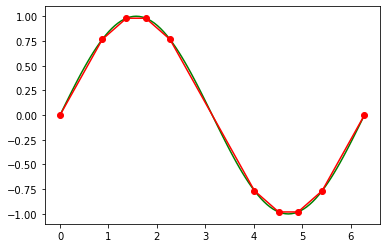

In [9]:
network_ys=[ network(x) for x in sinus_xs ]

plt.plot(sinus_xs,sinus_ys,'g-');
plt.plot(knees_xs,knees_ys,'ro');
plt.plot(sinus_xs,network_ys,'r-');

This looks good. 

By the way, note that our piece-wise linear approximation (red) inscribes the sinus (green), i.e. in
absolute sense the network's estimate is always smaller: $|network(x)| \leq |sinus(x)|$.

Of course we could have written the layer code less repetitive, but the code is small enough to allow repetition and we believe this eases understanding.

## Create a Tensorflow model for the piece-wise linear sinus approximation

We will now make a Tensorflow model for our piece-wise linear approximation of sinus. We will not train it, but set the weights by hand. We start by importing some modules and seeding the random number generators (to ensure reproducibility).

In [10]:
import numpy as np
import tensorflow as tf

SEED = 42

np.random.seed(SEED)
tf.random.set_seed(SEED)

We create a model with exactly the same structure as `model_1` in the [sinus notebook](sinus.ipynb).

In [11]:
model_pwls = tf.keras.models.Sequential()
model_pwls.add( tf.keras.layers.Dense(9, activation='relu', input_shape=(1,)) )
model_pwls.add( tf.keras.layers.Dense(1) )
model_pwls.compile( optimizer='rmsprop', loss='mse', metrics=['mae'] )
model_pwls.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 9)                 18        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 10        
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________


For the first layer, the weights are 1 and the biases the x-coordinates of the kneepoints (see previous section).

In [12]:
weights1 = np.array([[1,1,1,1,1,1,1,1,1]], dtype=np.float32)
biases1 = np.array([-knees_xs[0],-knees_xs[1],-knees_xs[2],-knees_xs[3],-knees_xs[4],-knees_xs[5],-knees_xs[6],-knees_xs[7],-knees_xs[8]], dtype=np.float32)

print( "weights1 =", weights1)
print( "biases1  =", biases1 )

weights1 = [[1. 1. 1. 1. 1. 1. 1. 1. 1.]]
biases1  = [ 0.        -0.8707963 -1.3707963 -1.7707963 -2.2707963 -4.012389
 -4.512389  -4.912389  -5.412389 ]


You might be a bit confused by the above data structuring. But this is what the keras interface requires when setting the "weights" (weights and biases) manually:

In [13]:
model_pwls.layers[0].set_weights([weights1,biases1])

Recall that we set the weights for one layer. Recall that, in general, a layer has `i` inputs and `o` outputs.
This means the layer has `o` neurons, each with `i` weights.

The `weights1` array is therefore two dimensional, but the first index is not the neuron but the input. In other words, `weights1[i,o]` is the weight for input `i` for output (neuron) `o`.

The `biases1` array is one dimensional, `biases1[o]` is the bias for output (neuron) `o`.

In layer 1, `i` ranges from 0..0 and `o` from 0..8.

For the second layer, the weights are pair wise differences of the slopes and the bias is the y-coordinate of the first knee point (see previous section).

In [14]:
weights2 = np.array([
              [slope0],
              [slope1 - slope0],
              [slope2 - slope1],
              [slope3 - slope2],
              [slope4 - slope3],
              [slope5 - slope4],
              [slope6 - slope5],
              [slope7 - slope6],
              [slope8 - slope7]
            ], dtype=np.float32)
biases2 = np.array([knees_xs[0]], dtype=np.float32)

print( "weights2 =", weights2)
print( "biases2  =", biases2 )

weights2 = [[ 0.878325  ]
 [-0.44787621]
 [-0.43044877]
 [-0.43044877]
 [-0.44787621]
 [ 0.44787621]
 [ 0.43044877]
 [ 0.43044877]
 [ 0.44787621]]
biases2  = [0.]


Again, recall that `weights2[i,o]` is the weight for input `i` for output (neuron) `o` and `biases2[o]` is the bias for output (neuron) `o`. In layer 2, `i` ranges from 0..8 and `o` from 0..0.

We set these value for the next layer.

In [15]:
model_pwls.layers[1].set_weights([weights2,biases2])

We can plot this manually configured model. It is much better than the result of training of the model as we did
in the [sinus notebook](sinus.ipynb)

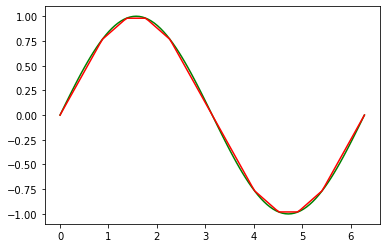

In [16]:
model_ys=[ model_pwls.predict([x])[0] for x in sinus_xs ]

plt.plot(sinus_xs,sinus_ys,'g-');
plt.plot(sinus_xs,model_ys,'r-');

## Training

The piece-wise linear approximation that we hand-crafted inscribes the sinus curve; it is always too "small". What would happen if we train it further?

In [17]:
model_pwls.fit(sinus_xs, sinus_ys, epochs=500, batch_size=4);

Epoch 1/500
26/26 [==============================] - 0s 480us/step - loss: 0.0010 - mae: 0.0233
Epoch 2/500
26/26 [==============================] - 0s 440us/step - loss: 5.9022e-04 - mae: 0.0184
Epoch 3/500
26/26 [==============================] - 0s 480us/step - loss: 5.1877e-04 - mae: 0.0169
Epoch 4/500
26/26 [==============================] - 0s 437us/step - loss: 5.2268e-04 - mae: 0.0167
Epoch 5/500
26/26 [==============================] - 0s 400us/step - loss: 5.2487e-04 - mae: 0.0167
Epoch 6/500
26/26 [==============================] - 0s 440us/step - loss: 5.2703e-04 - mae: 0.0167
Epoch 7/500
26/26 [==============================] - 0s 400us/step - loss: 5.2977e-04 - mae: 0.0167
Epoch 8/500
26/26 [==============================] - 0s 440us/step - loss: 5.3172e-04 - mae: 0.0167
Epoch 9/500
26/26 [==============================] - 0s 400us/step - loss: 5.3253e-04 - mae: 0.0167
Epoch 10/500
26/26 [==============================] - 0s 400us/step - loss: 5.3230e-04 - mae: 0.0167
Epo

26/26 [==============================] - 0s 400us/step - loss: 4.8187e-04 - mae: 0.0154
Epoch 83/500
26/26 [==============================] - 0s 400us/step - loss: 4.8165e-04 - mae: 0.0154
Epoch 84/500
26/26 [==============================] - 0s 400us/step - loss: 4.8145e-04 - mae: 0.0154
Epoch 85/500
26/26 [==============================] - 0s 440us/step - loss: 4.8125e-04 - mae: 0.0154
Epoch 86/500
26/26 [==============================] - 0s 399us/step - loss: 4.8104e-04 - mae: 0.0154
Epoch 87/500
26/26 [==============================] - 0s 400us/step - loss: 4.8086e-04 - mae: 0.0154
Epoch 88/500
26/26 [==============================] - 0s 440us/step - loss: 4.8066e-04 - mae: 0.0154
Epoch 89/500
26/26 [==============================] - 0s 400us/step - loss: 4.8048e-04 - mae: 0.0154
Epoch 90/500
26/26 [==============================] - 0s 360us/step - loss: 4.8029e-04 - mae: 0.0153
Epoch 91/500
26/26 [==============================] - 0s 440us/step - loss: 4.8011e-04 - mae: 0.0153
Epo

26/26 [==============================] - 0s 400us/step - loss: 4.7147e-04 - mae: 0.0152
Epoch 163/500
26/26 [==============================] - 0s 400us/step - loss: 4.7137e-04 - mae: 0.0152
Epoch 164/500
26/26 [==============================] - 0s 387us/step - loss: 4.7128e-04 - mae: 0.0152
Epoch 165/500
26/26 [==============================] - 0s 400us/step - loss: 4.7118e-04 - mae: 0.0152
Epoch 166/500
26/26 [==============================] - 0s 363us/step - loss: 4.7110e-04 - mae: 0.0152
Epoch 167/500
26/26 [==============================] - 0s 360us/step - loss: 4.7099e-04 - mae: 0.0152
Epoch 168/500
26/26 [==============================] - 0s 400us/step - loss: 4.7090e-04 - mae: 0.0152
Epoch 169/500
26/26 [==============================] - 0s 373us/step - loss: 4.7081e-04 - mae: 0.0152
Epoch 170/500
26/26 [==============================] - 0s 427us/step - loss: 4.7070e-04 - mae: 0.0152
Epoch 171/500
26/26 [==============================] - 0s 400us/step - loss: 4.7061e-04 - mae: 0

26/26 [==============================] - 0s 400us/step - loss: 4.6496e-04 - mae: 0.0151
Epoch 243/500
26/26 [==============================] - 0s 400us/step - loss: 4.6490e-04 - mae: 0.0151
Epoch 244/500
26/26 [==============================] - 0s 410us/step - loss: 4.6483e-04 - mae: 0.0151
Epoch 245/500
26/26 [==============================] - 0s 440us/step - loss: 4.6478e-04 - mae: 0.0151
Epoch 246/500
26/26 [==============================] - 0s 400us/step - loss: 4.6470e-04 - mae: 0.0151
Epoch 247/500
26/26 [==============================] - 0s 400us/step - loss: 4.6465e-04 - mae: 0.0151
Epoch 248/500
26/26 [==============================] - 0s 400us/step - loss: 4.6458e-04 - mae: 0.0151
Epoch 249/500
26/26 [==============================] - 0s 400us/step - loss: 4.6452e-04 - mae: 0.0151
Epoch 250/500
26/26 [==============================] - 0s 400us/step - loss: 4.6445e-04 - mae: 0.0151
Epoch 251/500
26/26 [==============================] - 0s 360us/step - loss: 4.6439e-04 - mae: 0

26/26 [==============================] - 0s 360us/step - loss: 4.6080e-04 - mae: 0.0150
Epoch 323/500
26/26 [==============================] - 0s 400us/step - loss: 4.6075e-04 - mae: 0.0150
Epoch 324/500
26/26 [==============================] - 0s 400us/step - loss: 4.6070e-04 - mae: 0.0150
Epoch 325/500
26/26 [==============================] - 0s 360us/step - loss: 4.6067e-04 - mae: 0.0150
Epoch 326/500
26/26 [==============================] - 0s 400us/step - loss: 4.6063e-04 - mae: 0.0150
Epoch 327/500
26/26 [==============================] - 0s 400us/step - loss: 4.6059e-04 - mae: 0.0150
Epoch 328/500
26/26 [==============================] - 0s 400us/step - loss: 4.6054e-04 - mae: 0.0150
Epoch 329/500
26/26 [==============================] - 0s 400us/step - loss: 4.6051e-04 - mae: 0.0150
Epoch 330/500
26/26 [==============================] - 0s 400us/step - loss: 4.6047e-04 - mae: 0.0150
Epoch 331/500
26/26 [==============================] - 0s 400us/step - loss: 4.6043e-04 - mae: 0

26/26 [==============================] - 0s 440us/step - loss: 4.5832e-04 - mae: 0.0150
Epoch 403/500
26/26 [==============================] - 0s 400us/step - loss: 4.5827e-04 - mae: 0.0150
Epoch 404/500
26/26 [==============================] - 0s 440us/step - loss: 4.5827e-04 - mae: 0.0150
Epoch 405/500
26/26 [==============================] - 0s 440us/step - loss: 4.5824e-04 - mae: 0.0150
Epoch 406/500
26/26 [==============================] - 0s 400us/step - loss: 4.5821e-04 - mae: 0.0150
Epoch 407/500
26/26 [==============================] - 0s 400us/step - loss: 4.5819e-04 - mae: 0.0150
Epoch 408/500
26/26 [==============================] - 0s 400us/step - loss: 4.5817e-04 - mae: 0.0150
Epoch 409/500
26/26 [==============================] - 0s 400us/step - loss: 4.5815e-04 - mae: 0.0150
Epoch 410/500
26/26 [==============================] - 0s 400us/step - loss: 4.5813e-04 - mae: 0.0150
Epoch 411/500
26/26 [==============================] - 0s 400us/step - loss: 4.5810e-04 - mae: 0

26/26 [==============================] - 0s 400us/step - loss: 4.5691e-04 - mae: 0.0150
Epoch 483/500
26/26 [==============================] - 0s 400us/step - loss: 4.5689e-04 - mae: 0.0150
Epoch 484/500
26/26 [==============================] - 0s 400us/step - loss: 4.5689e-04 - mae: 0.0150
Epoch 485/500
26/26 [==============================] - 0s 440us/step - loss: 4.5688e-04 - mae: 0.0150
Epoch 486/500
26/26 [==============================] - 0s 360us/step - loss: 4.5686e-04 - mae: 0.0150
Epoch 487/500
26/26 [==============================] - 0s 360us/step - loss: 4.5685e-04 - mae: 0.0150
Epoch 488/500
26/26 [==============================] - 0s 400us/step - loss: 4.5684e-04 - mae: 0.0150
Epoch 489/500
26/26 [==============================] - 0s 360us/step - loss: 4.5683e-04 - mae: 0.0150
Epoch 490/500
26/26 [==============================] - 0s 400us/step - loss: 4.5681e-04 - mae: 0.0150
Epoch 491/500
26/26 [==============================] - 0s 400us/step - loss: 4.5681e-04 - mae: 0

If we plot the new prodictions, we see a slight shift up on the left side, but nothing spectectular. The `mae` roughly halves from 0.0231 to 0.0117.

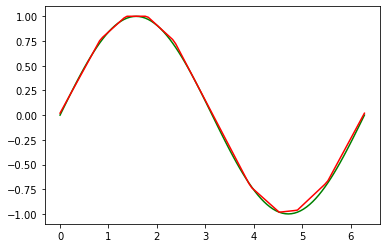

In [18]:
model_ys=[ model_pwls.predict([x])[0] for x in sinus_xs ]

plt.plot(sinus_xs,sinus_ys,'g-');
plt.plot(sinus_xs,model_ys,'r-');

(end)